In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs i will use
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [9]:
PATH = "D:/FOOD/3 classes/"

In [10]:
sz = 224

In [11]:
os.listdir(PATH)

['models', 'sample', 'test1', 'tmp', 'train', 'valid']

In [12]:
os.listdir(f'{PATH}/valid')

['Dolmeh', 'gheymeh', 'pizza']

# size of my Data sets , number of pictures for each food

### validation sets

In [82]:
val_Dolmeh = os.listdir(f'{PATH}valid/Dolmeh')
len(val_Dolmeh)

142

In [83]:
val_gheymeh = os.listdir(f'{PATH}valid/gheymeh')
len(val_gheymeh)

89

In [84]:
val_pizza = os.listdir(f'{PATH}valid/pizza')
len(val_pizza)

193

### training sets

In [85]:
val_Dolmeh = os.listdir(f'{PATH}train/Dolmeh')
len(val_Dolmeh)

332

In [86]:
val_gheymeh = os.listdir(f'{PATH}train/gheymeh')
len(val_gheymeh)

249

In [87]:
val_pizza = os.listdir(f'{PATH}train/pizza')
len(val_pizza)

505

In [ ]:
files = os.listdir(f'{PATH}valid/Dolmeh')[:10]

In [25]:
files

['images.jfif',
 'images_002.jfif',
 'images_003.jfif',
 'images_004.jfif',
 'images_005.jfif',
 'images_006.jfif',
 'images_007.jfif',
 'images_008.jfif',
 'images_009.jfif',
 'images_010.jfif']

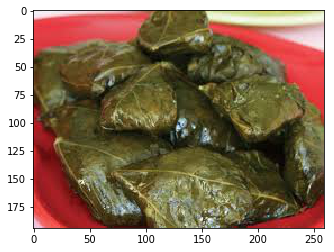

In [26]:
img = plt.imread(f'{PATH}valid/Dolmeh/{files[6]}')
plt.imshow(img)

In [27]:
arch = resnet34
data = ImageClassifierData.from_paths(PATH,tfms = tfms_from_model(arch,sz))
learn = ConvLearner.pretrained(arch,data,precompute=True)

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [02:19<00:00, 18.37s/it]


In [30]:
Lr = 0.005

In [32]:
learn.fit(Lr,10)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.387086   0.306892   0.891509  
    1      0.323398   0.251531   0.912736                                                                              
    2      0.282178   0.231471   0.908019                                                                              
    3      0.248455   0.217282   0.926887                                                                              
    4      0.225691   0.210701   0.926887                                                                              
    5      0.203535   0.202376   0.929245                                                                              
    6      0.189696   0.202627   0.929245                                                                              
    7      0.170467   0.195282   0.929245                                                                           

[array([0.19103]), 0.9339622641509434]

In [33]:
data.classes

['Dolmeh', 'gheymeh', 'pizza']

In [40]:
log_preds= learn.predict() #predictions for the validation set

In [41]:
log_preds

array([[-0.00035, -8.27679, -9.29588],
       [-0.0615 , -3.11089, -4.19385],
       [-0.02572, -3.6776 , -9.14363],
       ...,
       [-9.36799, -8.95274, -0.00021],
       [-8.55685, -8.04919, -0.00051],
       [-9.78378, -8.2227 , -0.00032]], dtype=float32)

In [42]:
preds = np.argmax(log_preds,axis = 1)

In [58]:
preds[:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [60]:
preds[-10:]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [50]:
type(log_preds)

numpy.ndarray

In [51]:
log_preds.shape

(424, 3)

In [43]:
probs = np.exp(log_preds[: , 1])

In [52]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], min(len(preds), 4), replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [61]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8)) if len(imgs)>0 else print('Not Found.')

Correctly classified


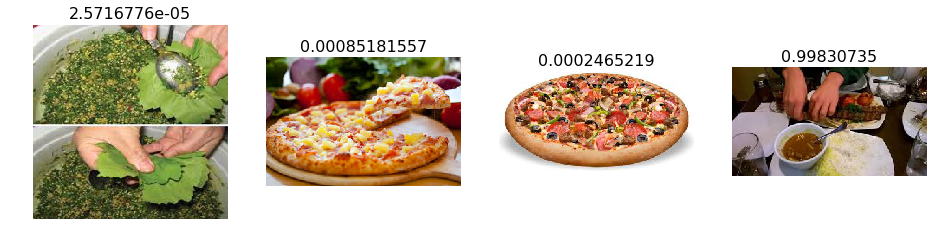

In [62]:
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


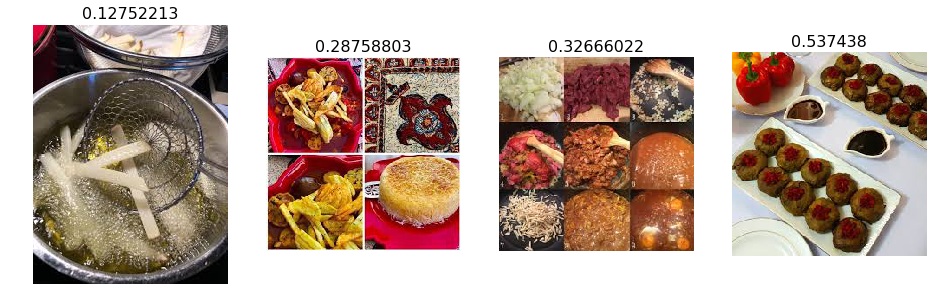

In [63]:
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [65]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Most correct cats


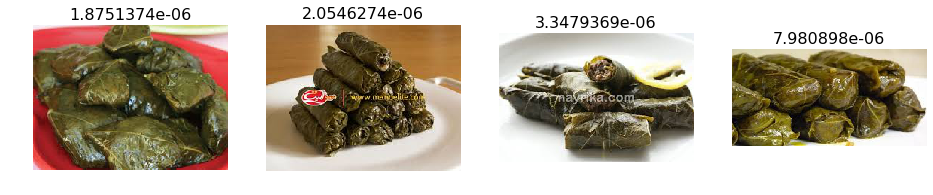

In [66]:
plot_val_with_title(most_by_correct(0, True), "Most correct cats")

Most correct gheimeh


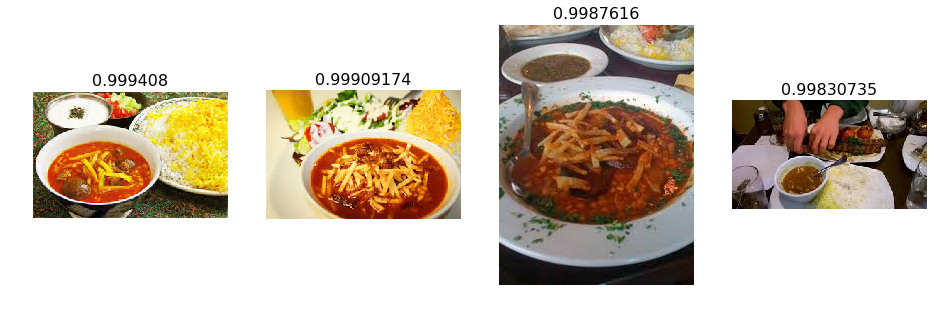

In [68]:
plot_val_with_title(most_by_correct(1, True), "Most correct gheimeh")

Most correct pizza


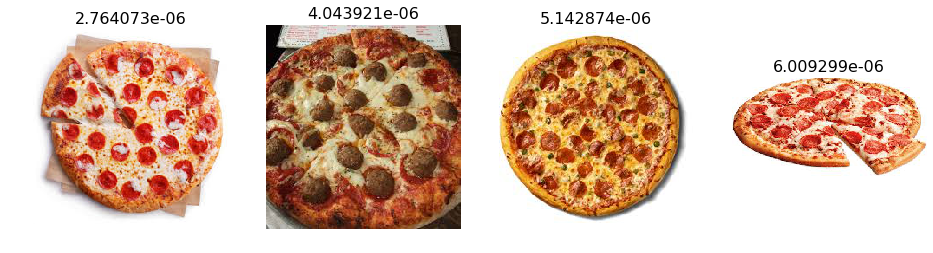

In [70]:
plot_val_with_title(most_by_correct(2, True), "Most correct pizza")

Most correct Dolmeh


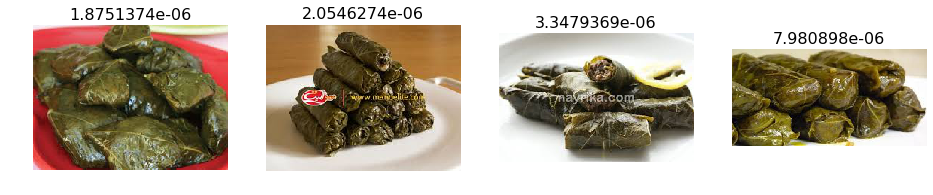

In [72]:
plot_val_with_title(most_by_correct(0, True), "Most correct Dolmeh")

these labled Dolmeh but we couldn't predict


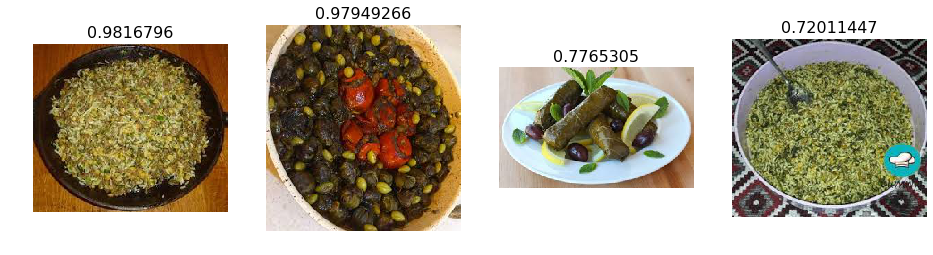

In [78]:
plot_val_with_title(most_by_correct(0, False), "labled Dolmeh but we couldn't predict Dolmeh")

gheymeh labled , but we couldn't predict gheymeh


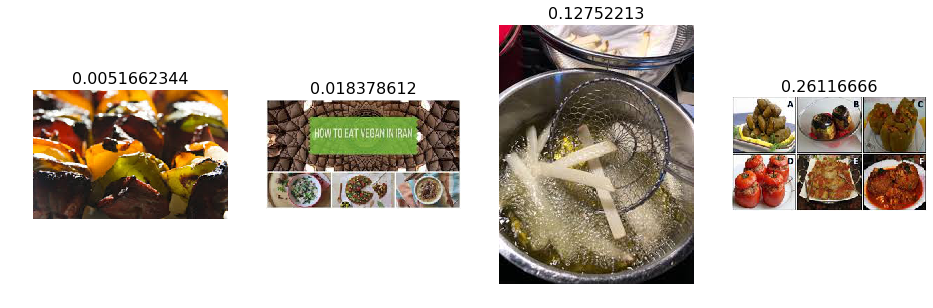

In [80]:
plot_val_with_title(most_by_correct(1, False), "gheymeh labled , but we couldn't predict gheymeh")

gheymeh labled , but we couldn't predict gheymeh


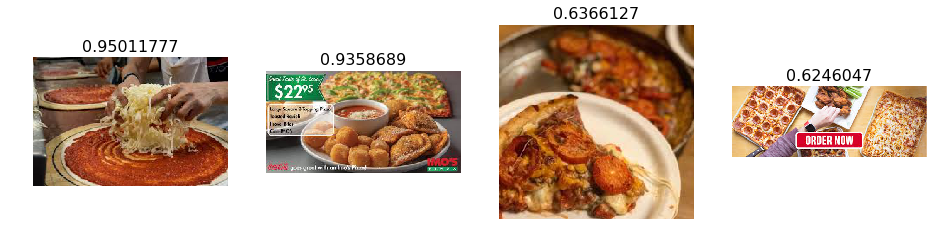

In [81]:
plot_val_with_title(most_by_correct(2, False), "pizza labled , but we couldn't predict pizza")